# ggplot2 - Data Visualization
- 최근 데이터 시각화에 많이 쓰이는 package
- R의 기본 plot에 비해 좀 **있어보이는(?)** 그래프를 그릴 수 있음

> 사용하면서 추가적으로 알게 되는 내용은 계속 수정해 나갈 계획입니다!!

In [1]:
library(tidyverse)   # ggplot 뿐 아니라 다양한 package를 모아놓음
library(gridExtra)   # ggplot으로 subplot 그리기 위한 패키지

-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
√ ggplot2 3.0.0     √ purrr   0.2.5
√ tibble  1.4.2     √ dplyr   0.7.6
√ tidyr   0.8.1     √ stringr 1.3.1
√ readr   1.1.1     √ forcats 0.3.0
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


## Subplot 그리기
- `par()` 함수와 같이 여러 plot을 한 번에 그리는 방법
- `gridExtra` 패키지를 사용하여 그릴 수 있음(다른 패키지들도 있음)

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


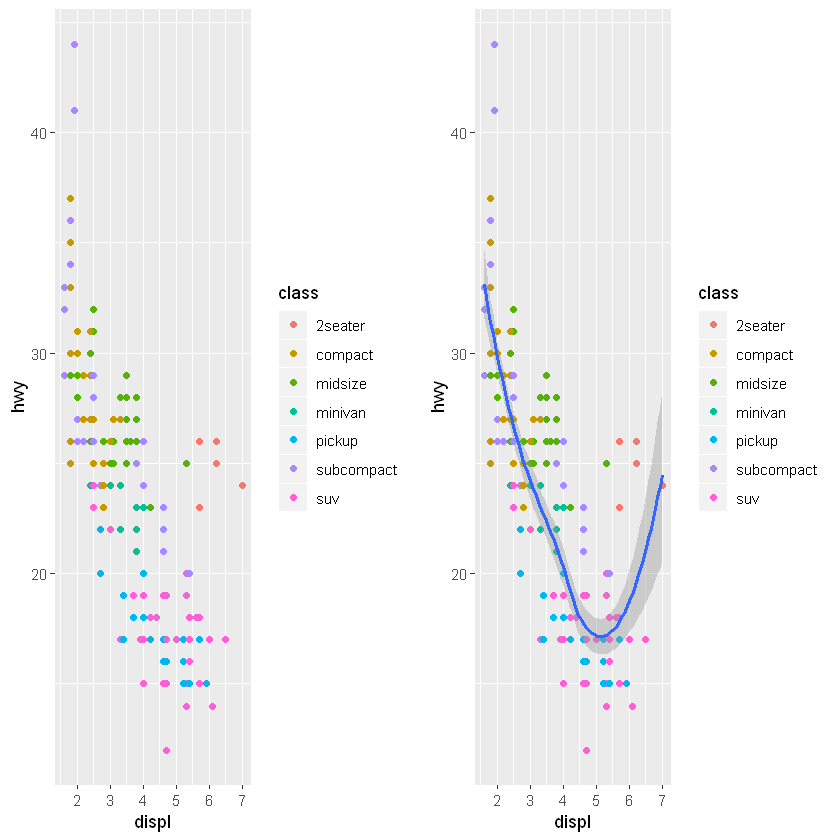

In [77]:
p1 <- ggplot(mpg) +
  geom_point(aes(x = displ, y = hwy, color = class))
p2 <- ggplot(mpg, aes(x = displ, y = hwy)) + 
  geom_point(aes(color = class)) + 
  geom_smooth()

# 한 번에 그리기
grid.arrange(p1, p2, ncol=2)

## 다양한 plot 그리기
- `geom_표현방법`으로 그림
    - `geom_point()`, `geom_line()` 등
- `aes(x축, y축)`의 형태로 그래프로 나타낼 변수를 지정 
    - `color(colour)`, `fill`, `size` 등의 옵션으로 group별로 다른 형태로 표현할 수 있음

#### `geom_point()` : 산점도

Warning message:
"Using size for a discrete variable is not advised."Warning message:
"Using alpha for a discrete variable is not advised."Warning message:
"The shape palette can deal with a maximum of 6 discrete values because
more than 6 becomes difficult to discriminate; you have 7. Consider
specifying shapes manually if you must have them."Warning message:
"Removed 62 rows containing missing values (geom_point)."

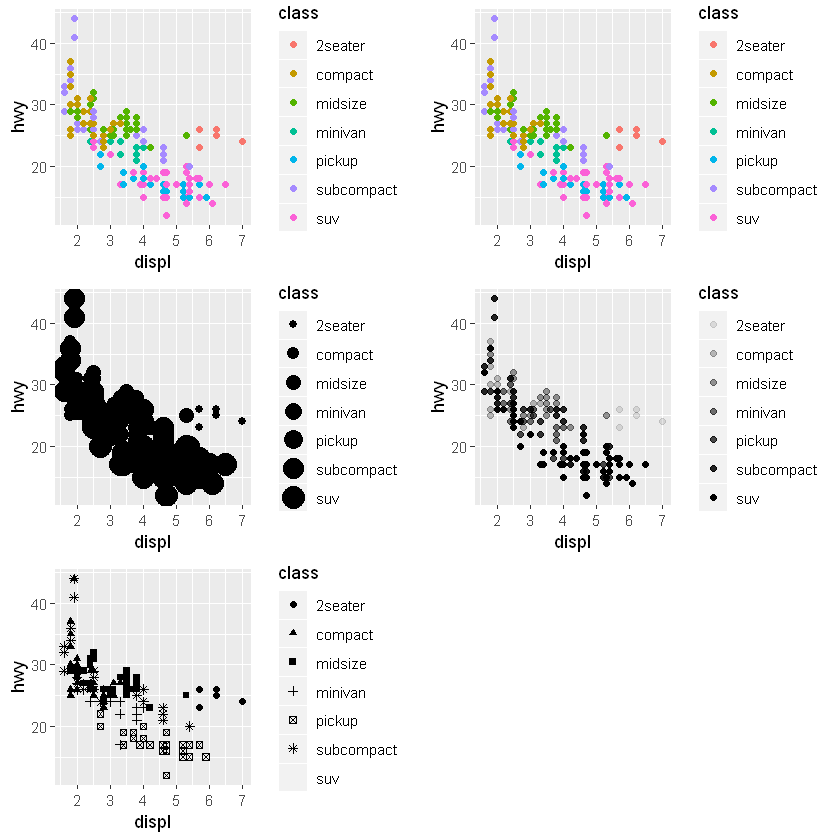

In [63]:
p1 <- ggplot(mpg) +
    geom_point(aes(x = displ, y = hwy, color = class))
p2 <- ggplot(mpg) +
    geom_point(aes(x = displ, y = hwy, color = class))

# warning message - size에는 원래 numeric값이 들어가야하지만 class별로 다르게 그려지긴함
p3 <- ggplot(mpg) + 
    geom_point(aes(x = displ, y = hwy, size = class))   

# warning message - ggplot은 기본적으로 6개의 class만 표현 가능
p4 <- ggplot(data = mpg) + 
  geom_point(mapping = aes(x = displ, y = hwy, alpha = class))   
p5 <- ggplot(data = mpg) + 
  geom_point(mapping = aes(x = displ, y = hwy, shape = class)) 

# 한 번에 그리기
grid.arrange(p1, p2, p3, p4, p5,
             ncol = 2)

#### `geom_smooth()` : LOESS를 사용하여 smooth curve를 그려줌

`geom_smooth()` using method = 'loess' and formula 'y ~ x'
`geom_smooth()` using method = 'loess' and formula 'y ~ x'
`geom_smooth()` using method = 'loess' and formula 'y ~ x'
`geom_smooth()` using method = 'loess' and formula 'y ~ x'
`geom_smooth()` using method = 'loess' and formula 'y ~ x'


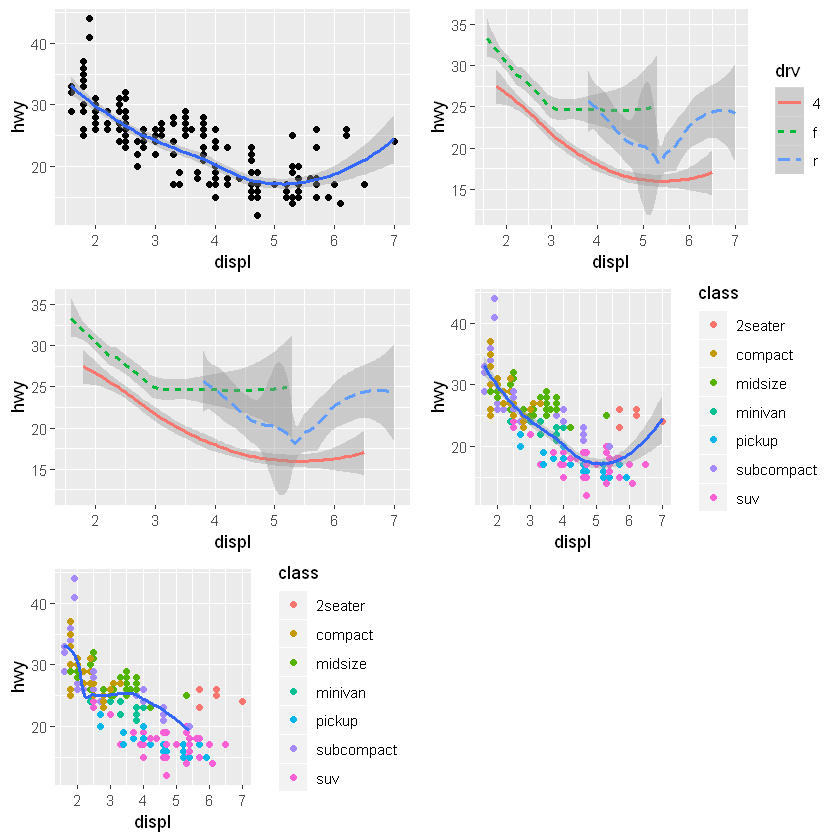

In [68]:
p1 <- ggplot(mpg, aes(x = displ, y = hwy)) + 
    geom_point() +
    geom_smooth()

# drv 변수의 class 별로 각각 그린 그래프
p2 <- ggplot(mpg) + 
  geom_smooth(aes(x = displ, y = hwy, linetype = drv, color = drv))

# legend 없앤 그래프
p3 <- ggplot(mpg, aes(x = displ, y = hwy, linetype = drv, color = drv)) +
    geom_smooth(show.legend = F)

p4 <- ggplot(mpg, aes(x = displ, y = hwy)) + 
  geom_point(aes(color = class)) + 
  geom_smooth()

# filter로 조건에 맞는 데이터만 그리는 것도 가능
p5 <- ggplot(data = mpg, mapping = aes(x = displ, y = hwy)) + 
  geom_point(mapping = aes(color = class)) + 
  geom_smooth(data =filter(mpg, class == "subcompact"), se = FALSE)

grid.arrange(p1, p2, p3, p4, p5,
             ncol = 2)

#### `geom_bar()` : 막대 그래프

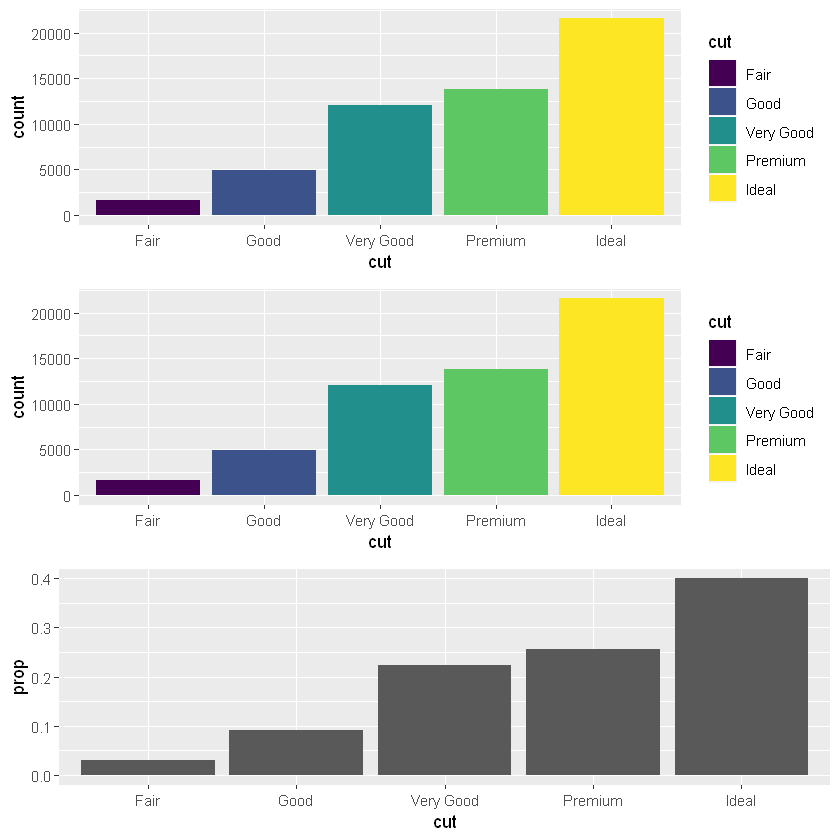

In [65]:
p1 <- ggplot(diamonds) + 
    geom_bar(aes(x = cut, fill = cut))

# color 대신 fill 옵션을 사용하여 다른 색으로 표현 가능
p2 <- ggplot(diamonds) + 
    geom_bar(aes(x = cut, fill = cut))

# proportion으로 표현
p3 <- ggplot(diamonds) + 
  geom_bar(aes(x = cut, y = stat(prop), group = 1))

grid.arrange(p1, p2, p3,
             ncol = 1)

## facet
- 해석: 측면, 양상(by Papago)
- 간단하게 subplot을 그릴 수 있는 방법
- 특히, 범주형 변수(categorical variable)을 표현할 때 유용

#### (1) `facet_wrap()`
- `ncol`, `nrow` 옵션으로 subplot의 행, 열 개수를 지정할 수 있음
- 2개 이상의 변수를 조합하여 사용시, 각 조합의 값이 있는 경우만 그려짐

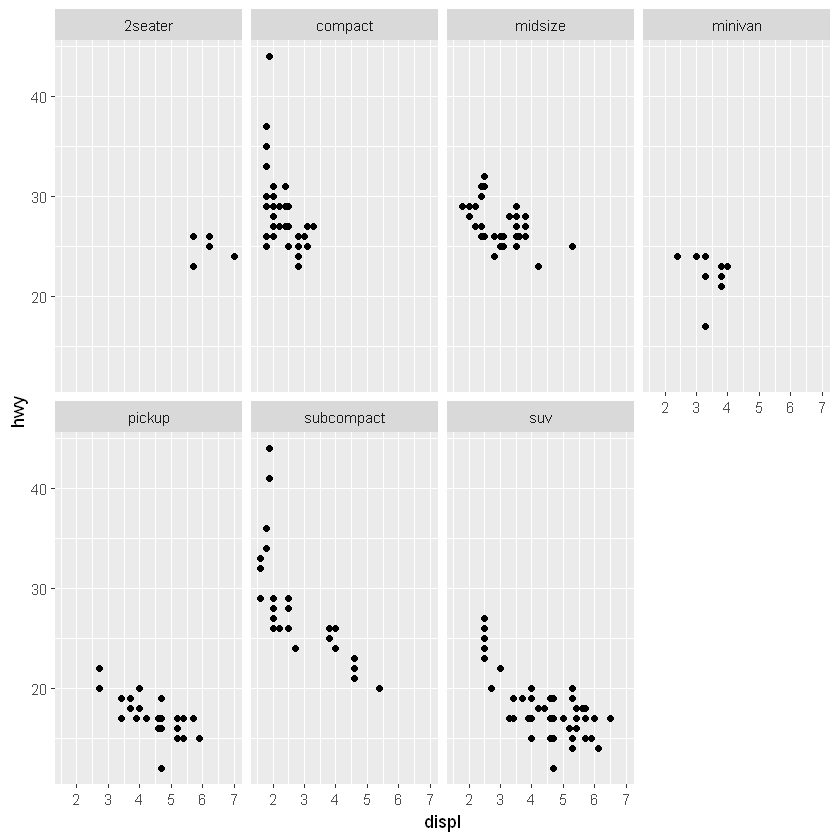

In [16]:
# 1 variable - class의 값 별로 그린 산점도
ggplot(mpg) + 
    geom_point(aes(x = displ, y = hwy)) + 
    facet_wrap(~ class, nrow = 2)

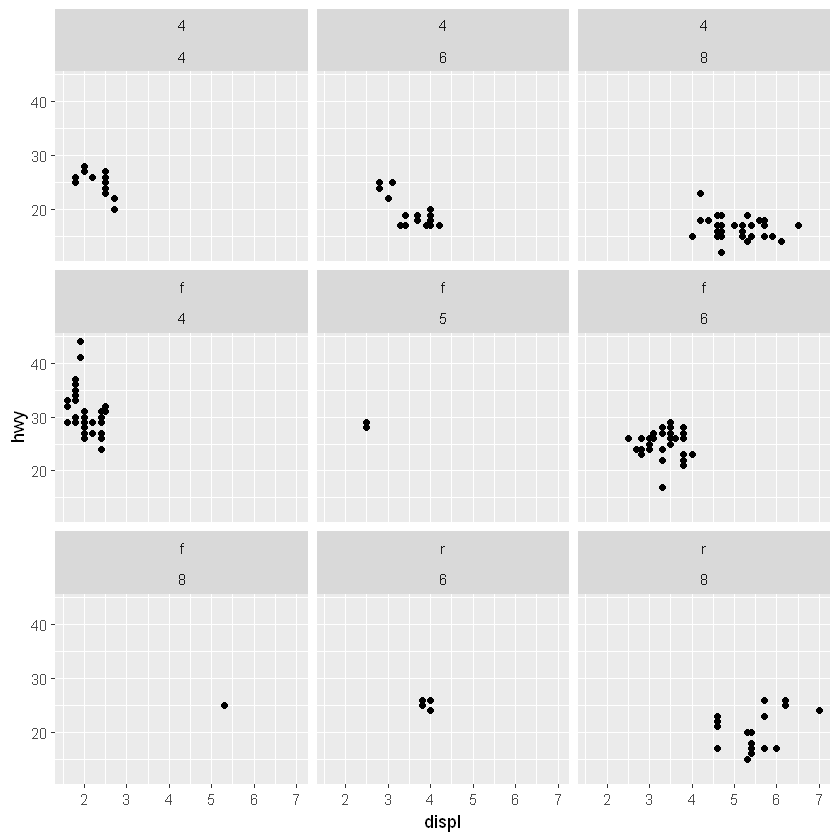

In [25]:
# 2 variables - 범주형 변수 2개의 조합별로 각각 그린 그래프
ggplot(data = mpg) + 
    geom_point(mapping = aes(x = displ, y = hwy)) + 
    facet_wrap(drv ~ cyl, ncol=3)

#### (2) `facet_grid()`
- formula에서 subplot 방향을 지정
    - `변수 ~ .` : 세로 축으로 그려짐
    - `. ~ 변수` : 가로 축으로 그려짐
- 2개 이상의 변수를 조합하여 사용시, 해당 변수들이 큰 축이 되어 그려짐(밑의 예시 확인)

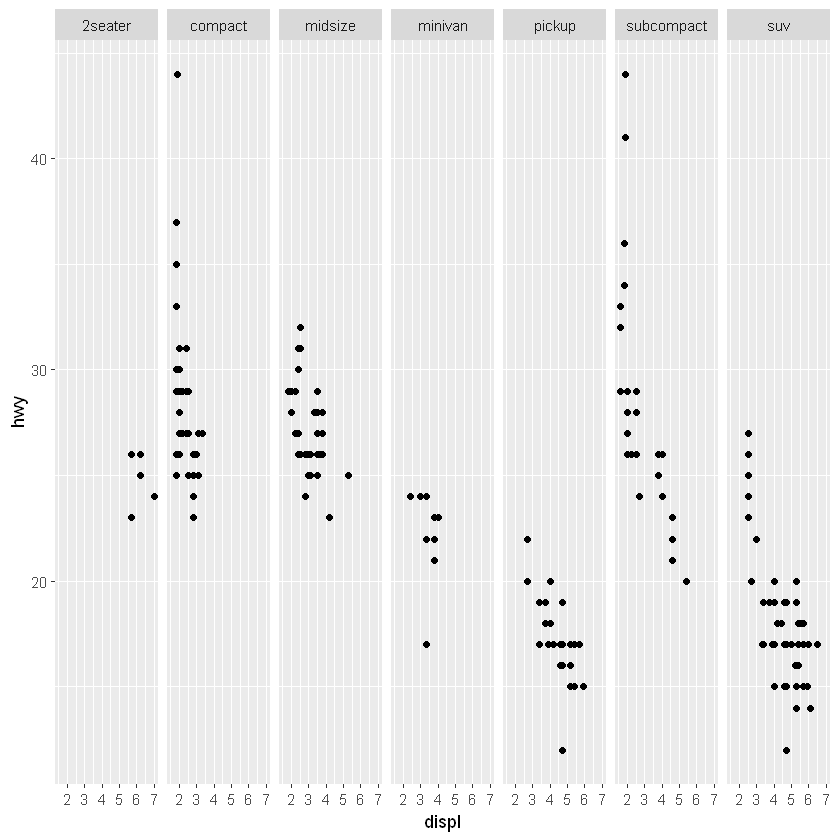

In [30]:
# 1 variable - 가로
ggplot(mpg) + 
    geom_point(aes(x = displ, y = hwy)) + 
    facet_grid(. ~ class)

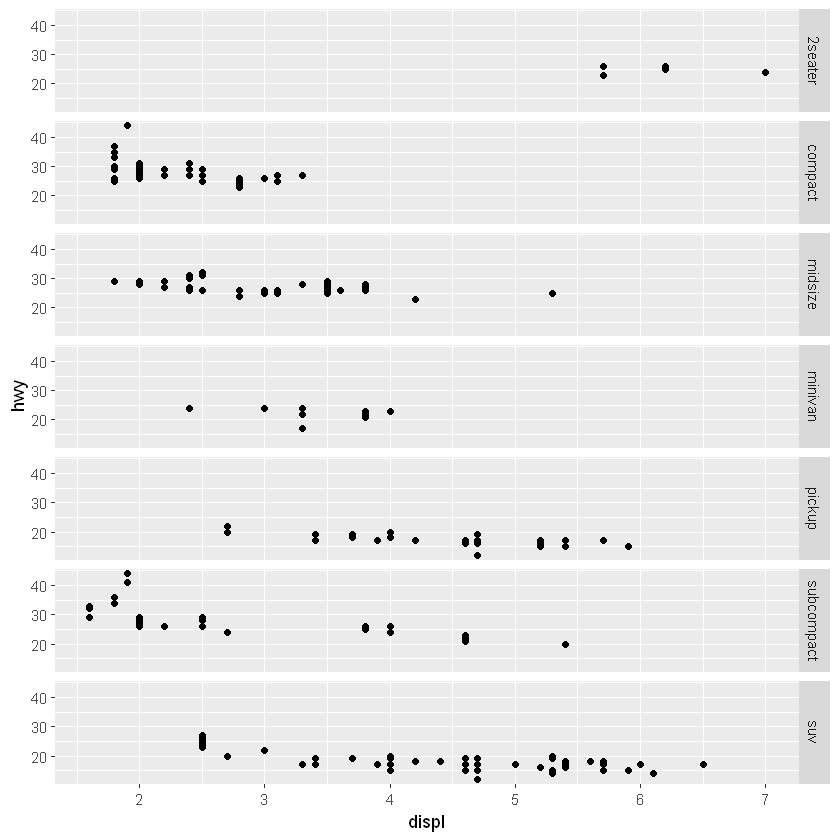

In [31]:
# 1 variable - 세로
ggplot(mpg) + 
    geom_point(aes(x = displ, y = hwy)) + 
    facet_grid(class ~ .)

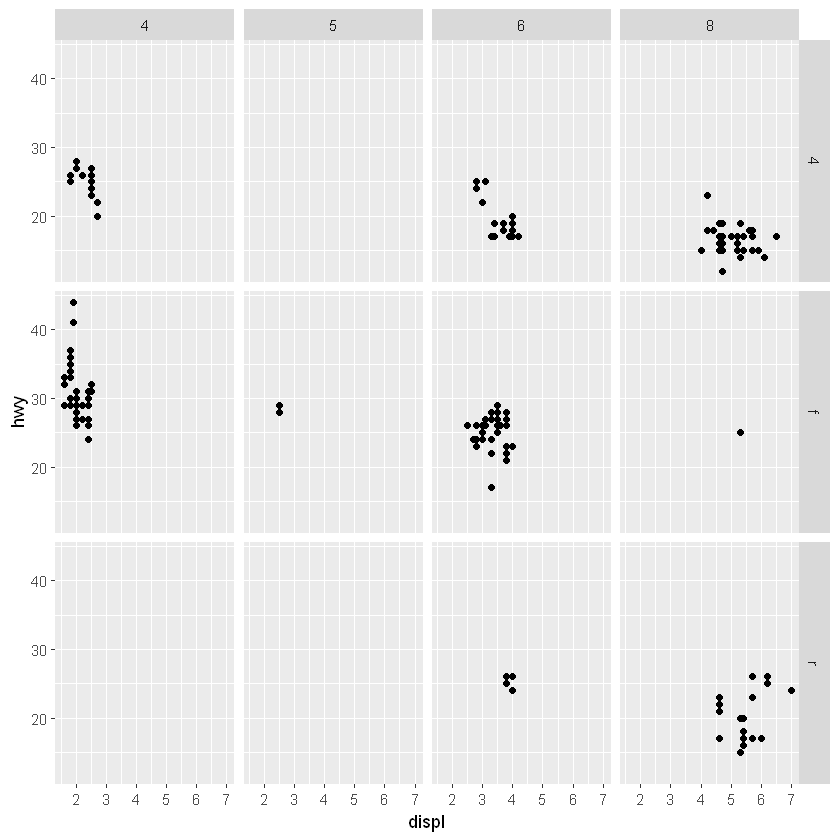

In [32]:
# 2 variables - 범주형 변수 2개의 조합별로 각각 그린 그래프
ggplot(data = mpg) + 
    geom_point(mapping = aes(x = displ, y = hwy)) + 
    facet_grid(drv ~ cyl)

## Theme
- 여러가지 theme이 있어 이뻐보이는 것을 골라서 쓰면 됨
    - `theme_bw()`, `theme_minimal()` 등

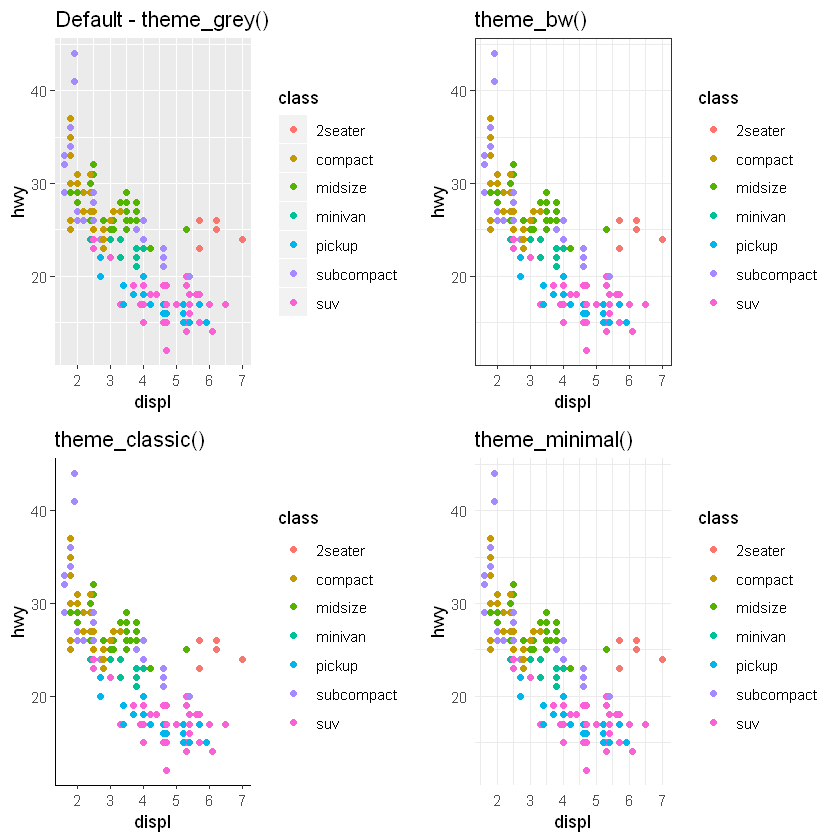

In [75]:
# default: theme_grey()
p1 <- ggplot(mpg) +
    geom_point(aes(x = displ, y = hwy, color = class)) + 
    ggtitle("Default - theme_grey()")
p2 <- p1 +
    theme_bw() + 
    ggtitle("theme_bw()")
p3 <- p1 +
    theme_classic() + 
    ggtitle("theme_classic()")
p4 <- p1 +
    theme_minimal() + 
    ggtitle("theme_minimal()")

grid.arrange(p1, p2, p3, p4,
             ncol=2)

### Reference
- [**R for Data Science**](https://r4ds.had.co.nz/)